In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Load the dataset from CSV
df = pd.read_csv("heart_data.csv")

In [3]:
# Separate features (X) and target variable (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

In [5]:
# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [6]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

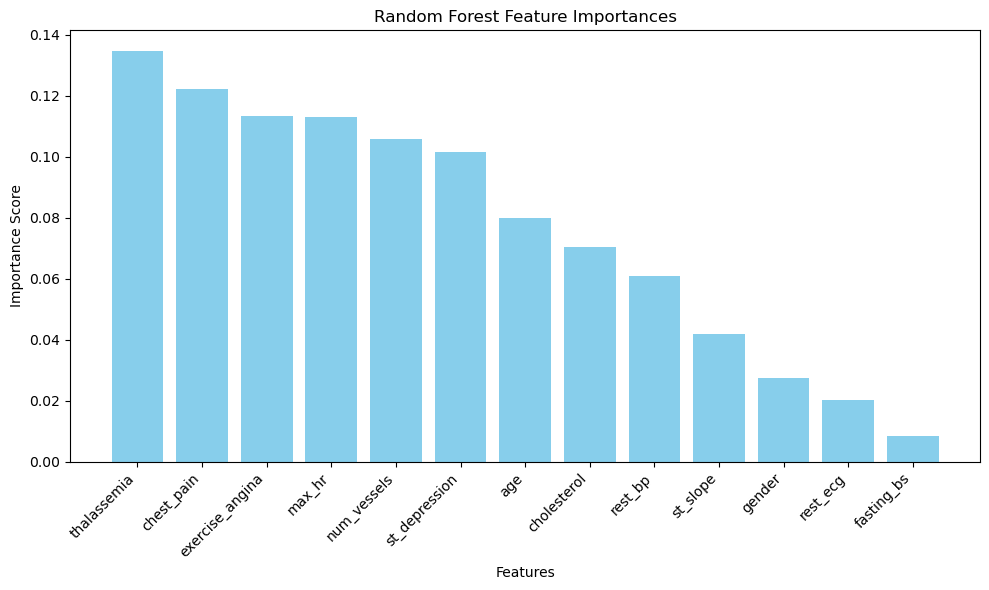

thalassemia: 0.13467303993397764
chest_pain: 0.12211314999119169
exercise_angina: 0.11347060338903348
max_hr: 0.11286415488544328
num_vessels: 0.10583925226716015
st_depression: 0.10159889095109093
age: 0.0798313227261437
cholesterol: 0.07024181392078713
rest_bp: 0.06103355727200342
st_slope: 0.041946765698977734
gender: 0.027598900333415857
rest_ecg: 0.020364996793765484
fasting_bs: 0.008423551837009676


In [10]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Random Forest Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print feature importances as text
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

In [8]:
# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy score
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.7


In [9]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        33
           1       0.70      0.59      0.64        27

    accuracy                           0.70        60
   macro avg       0.70      0.69      0.69        60
weighted avg       0.70      0.70      0.70        60



In [15]:
sample_data = [[120, 3, 0, 45, 0, 160, 1, 0, 1, 240, 2.0, 1, 0]]
prediction = rf_model.predict(sample_data)

print("Prediction:", prediction)

Prediction: [0]


c:\Users\anitm\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
